### **Analysis of how the number of enrollments affect the UFRN students overall performance**

Project made by:
- Anderson Santos de Medeiros
- André Luiz de Lucena Moreira
- Paulo Torres Aragão Neto

In this project, we are going to analysis how the number of enrollments affect the students overall performance, making a comparision between some of the UFRN courses. This study was made using the open dataframes found in http://dados.ufrn.br/dataset/matriculas-componentes, which contains data from 2 years of enrollments made by the UFRN students. To do such analysis, we used only valid enrollments, in other words, the enrollments where the student doesn't gave up from in the middle of semester.

First of all, let's import the libraries required to analyse the data.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now we must load all the dataframes from the 2 years of information, therefore, we must take the data from the semesters of 2016.1, 2016.2, 2017.1 and 2017.2.

In [2]:
#Loading dataframes from all the 4 semesters
grades20161 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv', sep=';')
grades20162 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv', sep=';')
grades20171 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171', sep=';')
grades20172 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172', sep=';')

The dataframes are structured as follows:

In [3]:
#Showing the structure of the dataframe
grades20161.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,Unnamed: 10
0,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,1.0,10.0,f,0.0,9.0,0.0,APROVADO,NaN
1,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,2.0,7.0,f,0.0,9.0,0.0,APROVADO,NaN
2,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,1.0,0.0,f,0.0,0.0,0.0,REPROVADO,NaN
3,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,2.0,0.0,f,0.0,0.0,0.0,REPROVADO,NaN
4,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,3.0,0.0,f,0.0,0.0,0.0,REPROVADO,NaN


Now, some of the dataframes has a undefined and strange column, so we must remove it.

In [4]:
#Removing a undefined column from the 2016.1 and 2016.2 dataframes
grades20161 = grades20161.drop('Unnamed: 10',1)
grades20162 = grades20162.drop('Unnamed: 10',1)

We must filter the data to use only the valid enrollments in the analysis, so, to do it, a function was defined to clean all of the invalid enrollments.

In [5]:
#Function for filtering data to get only the valid enrollments
def filter_columns(df):
    df = df.drop(df[df.descricao == 'DESISTENCIA'].index)
    df = df.drop(df[df.descricao == 'CANCELADO'].index)
    df = df.drop(df[df.descricao == 'INDEFERIDO'].index)
    df = df.drop(df[df.descricao == 'REPROVADO POR MÉDIA E POR FALTAS'].index)
    df = df.drop(df[df.descricao == 'CANCELADO'].index)
    df = df.drop(df[df.descricao == 'EXCLUIDA'].index)
    df = df.drop(df[df.descricao == 'TRANCADO'].index)
    df = df.drop(df[df.descricao == 'AGUARDANDO DEFERIMENTO'].index)
    df = df.drop(df[df.descricao == 'REPROVADO POR NOTA E FALTA'].index)
    df = df.drop(df[df.descricao == 'CUMPRIU'].index)
    df = df.drop(df[df.descricao == 'DISPENSADO'].index)
    df = df.drop(df[df.descricao == 'TRANSFERIDO'].index)
    df = df.drop(df[df.descricao == 'INCORPORADO'].index)
    return df

The next step is call the function declared above for each one of the semesters in order to filter them.

In [6]:
#Filtering data to get only the valid enrollments from 2016.1
grades20161 = filter_columns(grades20161)

In [7]:
#Filtering data to get only the valid enrollments from 2016.2
grades20162 = filter_columns(grades20162)

In [8]:
#Filtering data to get only the valid enrollments from 2017.1
grades20171 = filter_columns(grades20171)

In [9]:
#Filtering data to get only the valid enrollments from 2017.2
grades20172 = filter_columns(grades20172)

After this filters, our dataframe must have this format:

In [10]:
grades20161.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao
0,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,1.0,10.0,f,0.0,9.0,0.0,APROVADO
1,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,2.0,7.0,f,0.0,9.0,0.0,APROVADO
2,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,1.0,0.0,f,0.0,0.0,0.0,REPROVADO
3,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,2.0,0.0,f,0.0,0.0,0.0,REPROVADO
4,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,3.0,0.0,f,0.0,0.0,0.0,REPROVADO


Now, some of the columns will no more be useful in our analysis, so we must remove it from the dataframes, to do so, we created a function.

In [11]:
#Function to remove columns that are not used
def remove_columns(df):
    df = df.drop(['unidade', 'nota', 'reposicao', 'faltas_unidade', 'numero_total_faltas', 'descricao'], 1)
    return df

Now we must apply the removing function in all the 4 semester dataframes, in order to clear all the useless columns from them.

In [12]:
#Removing columns that are not used
grades20161 = remove_columns(grades20161)
grades20162 = remove_columns(grades20162)
grades20171 = remove_columns(grades20171)
grades20172 = remove_columns(grades20172)

Now our dataframe must have this format:

In [13]:
grades20161.head()

,id_turma,discente,id_curso,media_final
0,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,9.0
1,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,9.0
2,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,0.0
3,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,0.0
4,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,0.0


Some of the remaining columns may have some missing data, so, in order to prevent this, we must clear all the missing values from our dataframes.

In [14]:
#Removing missing values
grades20161.dropna(inplace=True)
grades20162.dropna(inplace=True)
grades20171.dropna(inplace=True)
grades20172.dropna(inplace=True)

At this moment, we still with a huge problem in our dataframe, each studant is showed 3 times for each enrolled discipline, but the final grade is the same to all the 3. To prevent future problems in our analysis, we must garantee that the user will be showed just one time for each enrollement, to do so, we must remove all the duplicates from our dataframes, using student id and discipline id as a removal key.

In [15]:
#Each student is shown 3 times for each enrollment, but the final grade is the same for all the 3, so we are filtering that
grades20161 = grades20161.drop_duplicates(subset = ['id_turma','discente'])
grades20162 = grades20162.drop_duplicates(subset = ['id_turma','discente'])
grades20171 = grades20171.drop_duplicates(subset = ['id_turma','discente'])
grades20172 = grades20172.drop_duplicates(subset = ['id_turma','discente'])

Now, after cleaning the duplicates, we ended with the following dataframe:

In [16]:
grades20161.head()

,id_turma,discente,id_curso,media_final
0,57594062,069fb15661686bbc75f8c46af09b29ab,115439980.0,9.0
2,57594062,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,0.0
5,57594062,d42ac40a3a626084c01cea55f6841179,115439980.0,6.0
8,57594062,383cea5e8d0a2329a6b1bc1d460d5850,115439980.0,0.0
11,57594062,51f85303e4da5d2e658c1de414c8f49e,115439980.0,8.5


After the last changes, we can now remove the column of disciplines id, once our focus is more on the final grades than in the disciplines.

In [17]:
#We can now remove the column 'id_turma' from the dataframes
grades20161 = grades20161.drop('id_turma', 1)
grades20162 = grades20162.drop('id_turma', 1)
grades20171 = grades20171.drop('id_turma', 1)
grades20172 = grades20172.drop('id_turma', 1)

Once we filtered the dataframes, removing all the duplicates, it must have one instance of student by discipline enrolled, which means that the number of disciplines enrolled per student is equals to the number of times he or she appears on the dataframes. So, for further use, we must get that information and store it.

In [18]:
#We are storing the number of enrollments per student
enrollments20161 = grades20161.discente.value_counts()
enrollments20162 = grades20162.discente.value_counts()
enrollments20171 = grades20171.discente.value_counts()
enrollments20172 = grades20172.discente.value_counts()

Now we can create a new column containing all the disciplines enrolled per each student, for each semester.

In [19]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20161(row):
    return enrollments20161[row.discente]
grades20161['num_matriculas'] = grades20161.apply(funcenrollments20161, axis=1)

In [20]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20162(row):
    return enrollments20162[row.discente]
grades20162['num_matriculas'] = grades20162.apply(funcenrollments20162, axis=1)

In [21]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20171(row):
    return enrollments20171[row.discente]
grades20171['num_matriculas'] = grades20171.apply(funcenrollments20171, axis=1)

In [22]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20172(row):
    return enrollments20172[row.discente]
grades20172['num_matriculas'] = grades20172.apply(funcenrollments20172, axis=1)

Now that we have the number of disciplines enrolled per student stored in the column 'num_matriculas', let's see how our dataframe is looking:

In [23]:
grades20161.head()

,discente,id_curso,media_final,num_matriculas
0,069fb15661686bbc75f8c46af09b29ab,115439980.0,9.0,7
2,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,0.0,7
5,d42ac40a3a626084c01cea55f6841179,115439980.0,6.0,7
8,383cea5e8d0a2329a6b1bc1d460d5850,115439980.0,0.0,7
11,51f85303e4da5d2e658c1de414c8f49e,115439980.0,8.5,7


Now we must calculate the mean of all the final grades for each student, storing it for further use in our analysis.

In [24]:
#Now we stored the mean of all the final grades for each student
meangrades20161 = grades20161.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20162 = grades20162.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20171 = grades20171.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20172 = grades20172.pivot_table(index="discente", values="media_final", aggfunc=np.mean)

Once we already used the final grades of each student, the column will not be used anymore, so, we can remove it from our dataframes.

In [25]:
#The 'media_final' column's values will no more be used
grades20161 = grades20161.drop('media_final', 1)
grades20162 = grades20162.drop('media_final', 1)
grades20171 = grades20171.drop('media_final', 1)
grades20172 = grades20172.drop('media_final', 1)

Now the mean of the final grades must be stored in our dataframes, to do so, we created a new column, which will be responsible for storing it.

In [26]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20161(row):
    return meangrades20161.get_value(row.discente, 'media_final')
grades20161['media_final'] = grades20161.apply(store_values20161, axis=1)

/home/dattebayou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20162(row):
    return meangrades20162.get_value(row.discente, 'media_final')
grades20162['media_final'] = grades20162.apply(store_values20162, axis=1)

/home/dattebayou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20171(row):
    return meangrades20171.get_value(row.discente, 'media_final')
grades20171['media_final'] = grades20171.apply(store_values20171, axis=1)

/home/dattebayou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20172(row):
    return meangrades20172.get_value(row.discente, 'media_final')
grades20172['media_final'] = grades20172.apply(store_values20172, axis=1)

/home/dattebayou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


Now we must have the mean of all the final grades stored in the column 'media_final', lets see our dataframe:

In [30]:
grades20161.head()

,discente,id_curso,num_matriculas,media_final
0,069fb15661686bbc75f8c46af09b29ab,115439980.0,7,8.842857
2,1f266264613dc5fe158a5bb1b1d4c67f,115439980.0,7,0.000000
5,d42ac40a3a626084c01cea55f6841179,115439980.0,7,7.342857
8,383cea5e8d0a2329a6b1bc1d460d5850,115439980.0,7,0.242857
11,51f85303e4da5d2e658c1de414c8f49e,115439980.0,7,8.714286


Now, some of the students may have the mean of their final grades equals to 0, which might mean he or she gave up of the course, so, in order to inprove our analysis, we must remove these students from the dataframe.

In [31]:
grades20161 = grades20161.drop(grades20161[grades20161.media_final == 0.0].index)
grades20162 = grades20162.drop(grades20162[grades20162.media_final == 0.0].index)
grades20171 = grades20171.drop(grades20171[grades20171.media_final == 0.0].index)
grades20172 = grades20172.drop(grades20172[grades20172.media_final == 0.0].index)

We have come across one more time with the duplicates problem, because now that we have the mean of all the students final grades, a student must appear just one time per semester, so we must filter our dataframes to contain only one student per semester.

In [32]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20161 = grades20161.drop_duplicates(subset = ['discente'])

In [33]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20162 = grades20162.drop_duplicates(subset = ['discente'])

In [34]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20171 = grades20171.drop_duplicates(subset = ['discente'])

In [35]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20172 = grades20172.drop_duplicates(subset = ['discente'])

Now that we have the mean of all the students final grades, we can finally use them to calculate the mean of all grades by course, that will be ordered by the number of enrollments per students.

In [36]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20161 = grades20161.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [37]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20162 = grades20162.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [38]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20171 = grades20171.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [39]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20172 = grades20172.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

Let's see how the mean of all final grades by course looks like:

In [40]:
grades_by_course20161.head()

media_final
id_curso num_matriculas             
4970.0   1                  8.587234
         2                  7.629268
         3                  7.908120
         4                  8.192105
         5                  7.068000

The next step is store all the ids of the courses we want to analyse, for further use:

In [41]:
#Now we store the id of each course, for use it in the analysis
ti_id = 92127264.0
cb_id = 111635035.0
cet_id = 10320810.0
hist_id = 111635060.0

Now that we have the courses ids, it's time to get all the grades of the courses for plot the charts.

In [42]:
#Now we have to store the grades for each course in 2016.1
ti_grades_20161 = []
cb_grades_20161 = []
cet_grades_20161 = []
hist_grades_20161 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20161.append(grades_by_course20161.media_final[ti_id][x])
    cb_grades_20161.append(grades_by_course20161.media_final[cb_id][x])
    cet_grades_20161.append(grades_by_course20161.media_final[cet_id][x])
    hist_grades_20161.append(grades_by_course20161.media_final[hist_id][x])

In [43]:
#Now we have to store the grades for each course in 2016.2
ti_grades_20162 = []
cb_grades_20162 = []
cet_grades_20162 = []
hist_grades_20162 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20162.append(grades_by_course20162.media_final[ti_id][x])
    cb_grades_20162.append(grades_by_course20162.media_final[cb_id][x])
    cet_grades_20162.append(grades_by_course20162.media_final[cet_id][x])
    hist_grades_20162.append(grades_by_course20162.media_final[hist_id][x])

In [44]:
#Now we have to store the grades for each course in 2017.1
ti_grades_20171 = []
cb_grades_20171 = []
cet_grades_20171 = []
hist_grades_20171 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20171.append(grades_by_course20171.media_final[ti_id][x])
    cb_grades_20171.append(grades_by_course20171.media_final[cb_id][x])
    cet_grades_20171.append(grades_by_course20171.media_final[cet_id][x])
    hist_grades_20171.append(grades_by_course20171.media_final[hist_id][x])

In [45]:
#Now we have to store the grades for each course in 2017.2
ti_grades_20172 = []
cb_grades_20172 = []
cet_grades_20172 = []
hist_grades_20172 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20172.append(grades_by_course20172.media_final[ti_id][x])
    cb_grades_20172.append(grades_by_course20172.media_final[cb_id][x])
    cet_grades_20172.append(grades_by_course20172.media_final[cet_id][x])
    hist_grades_20172.append(grades_by_course20172.media_final[hist_id][x])

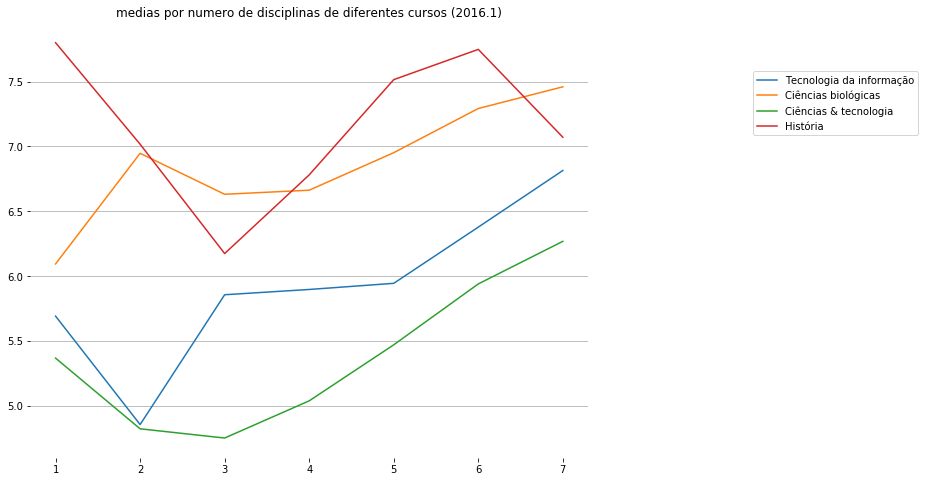

In [120]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),ti_grades_20161,label='Tecnologia da informação' )
plt.plot(range(1,8),cb_grades_20161,label='Ciências biológicas')
plt.plot(range(1,8),cet_grades_20161,label='Ciências & tecnologia')
plt.plot(range(1,8),hist_grades_20161,label='História')
plt.legend(loc='upper right',bbox_to_anchor=(1.6,0.9)) 
plt.title("medias por numero de disciplinas de diferentes cursos (2016.1)")
sns.despine(left=True, bottom=True)
plt.grid(axis='y')
plt.show()

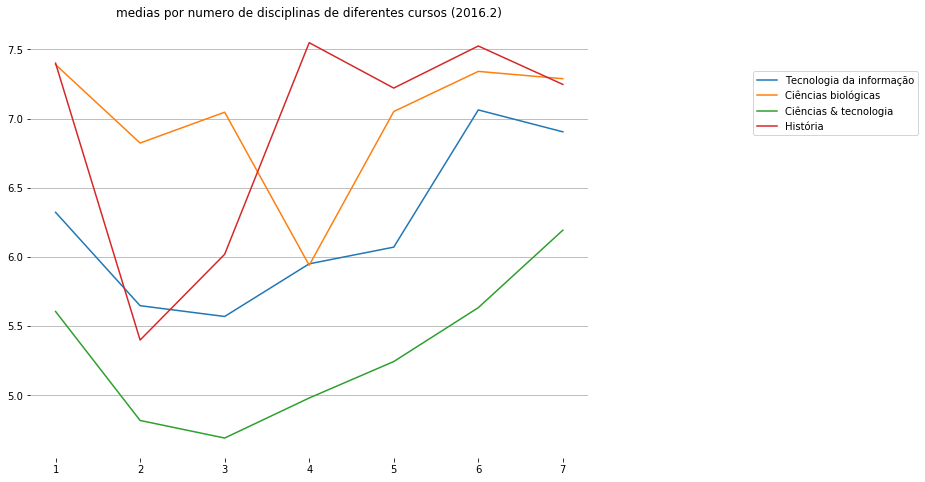

In [121]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),ti_grades_20162,label='Tecnologia da informação' )
plt.plot(range(1,8),cb_grades_20162,label='Ciências biológicas')
plt.plot(range(1,8),cet_grades_20162,label='Ciências & tecnologia')
plt.plot(range(1,8),hist_grades_20162,label='História')
plt.legend(loc='upper right',bbox_to_anchor=(1.6,0.9))
plt.title("medias por numero de disciplinas de diferentes cursos (2016.2)")
sns.despine(left=True, bottom=True)
plt.grid(axis='y')
plt.show()

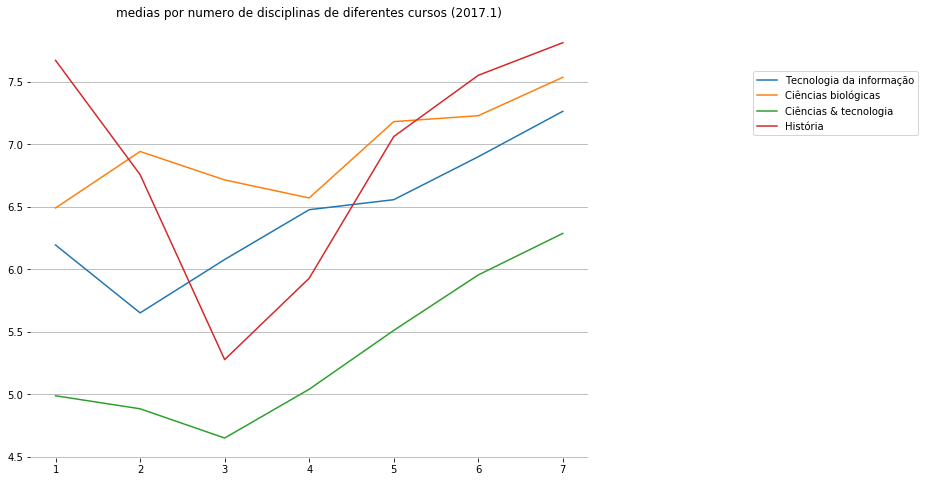

In [122]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),ti_grades_20171,label='Tecnologia da informação' )
plt.plot(range(1,8),cb_grades_20171,label='Ciências biológicas')
plt.plot(range(1,8),cet_grades_20171,label='Ciências & tecnologia')
plt.plot(range(1,8),hist_grades_20171,label='História')
plt.legend(loc='upper right',bbox_to_anchor=(1.6,0.9))
plt.title("medias por numero de disciplinas de diferentes cursos (2017.1)")
sns.despine(left=True, bottom=True)
plt.grid(axis='y')
plt.show()

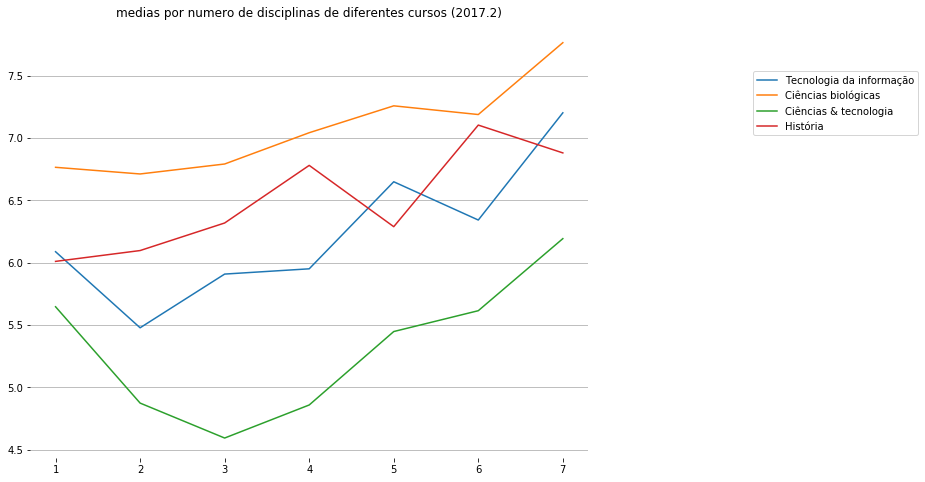

In [123]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),ti_grades_20172,label='Tecnologia da informação' )
plt.plot(range(1,8),cb_grades_20172,label='Ciências biológicas')
plt.plot(range(1,8),cet_grades_20172,label='Ciências & tecnologia')
plt.plot(range(1,8),hist_grades_20172,label='História')
plt.legend(loc='upper right',bbox_to_anchor=(1.6,0.9))
plt.title("medias por numero de disciplinas de diferentes cursos (2017.2)")
sns.despine(left=True, bottom=True)
plt.grid(axis='y')
plt.show()

In [51]:
# Setting chart Colors Using RGB

blue=(0/255,107/255,164/255)
red=(200/255,82/255,0/255)
orange=(255/255,128/255,14/255)
green=(0/255,100/255,50/255)

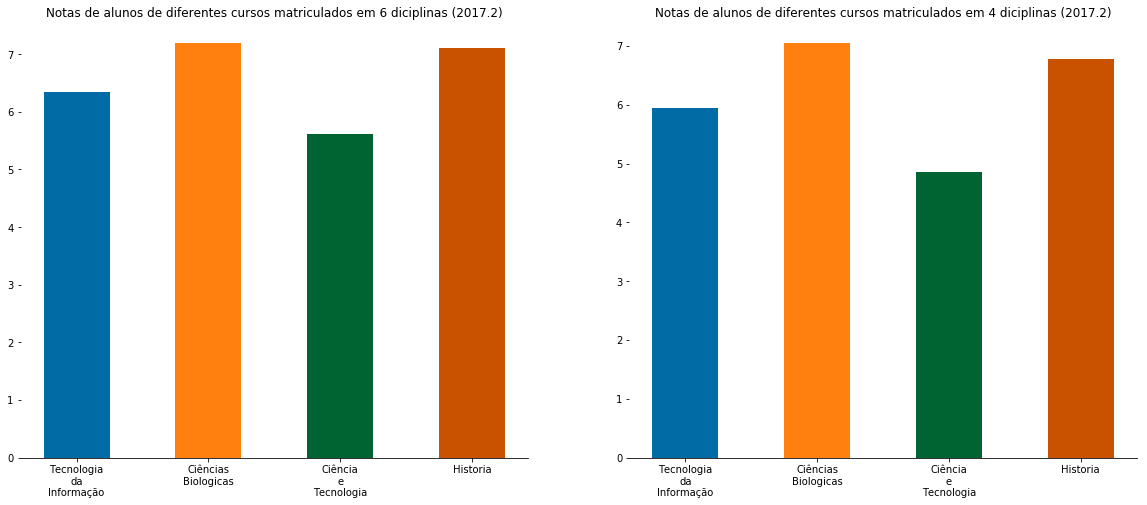

In [117]:
plt.figure(figsize=(20,8))
plt.subplot(121)
y=[ti_grades_20172[5],cb_grades_20172[5],cet_grades_20172[5],hist_grades_20172[5]]
x=range(4)
w=0.5
plt.bar(x,y,w,color=[blue,orange,green,red])
plt.xticks(x,('Tecnologia\nda\nInformação','Ciências\nBiologicas','Ciência\ne\nTecnologia','Historia'))
plt.title('Notas de alunos de diferentes cursos matriculados em 6 diciplinas (2017.2)')
sns.despine(left=True)
plt.subplot(122)
y=[ti_grades_20172[3],cb_grades_20172[3],cet_grades_20172[3],hist_grades_20172[3]]
x=range(4)
w=0.5
plt.bar(x,y,w,color=[blue,orange,green,red])
plt.xticks(x,('Tecnologia\nda\nInformação','Ciências\nBiologicas','Ciência\ne\nTecnologia','Historia'))
plt.title('Notas de alunos de diferentes cursos matriculados em 4 diciplinas (2017.2)')
sns.despine(left=True)